In [1]:
# Normal imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn import cluster, datasets, mixture
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import cycle, islice
import random
import sys
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install torch

In [0]:
# PyTorch imports
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
from torch.distributions.normal import Normal
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import gc

In [0]:
# Path to data
file_path = ''

In [0]:
# df = pd.read_csv(file_path + 'Archive/1.1.csv')

# df.head()

In [0]:
# X = df.loc[:, df.columns != 'time']
# X.head()

# Pre-Processing (CSV 1.1)

In [0]:
# Class with all the pre-processing methods
class preprocess:
  def __init__(self, data, explained_variance = 0.95):
    self.data = data
    self.explained_variance = explained_variance
    self.indices_to_drop = []
    self.X_reduced = None

  # Function for running PCA on the data
  def do_PCA(self, data, explained_variance):
    pca = PCA(explained_variance)

    principal_components = pca.fit(X)
    print('Num components that explain ' + str(explained_variance * 100) + '% of variance: ' + str(pca.n_components_))

    self.X_reduced = principal_components.transform(X)
    return(self.X_reduced)

  # Function for plotting (for visualization purposes)
  def plot_series(self, X):
    for i in range(np.shape(X)[1]):
      plt.plot(X[:,i])
      plt.title('feature'+  str(i))
      plt.show()

  # Function for running the actual preprocessing.  This uses pre-made sklearn 
  #  functions that were recommended for basic anomaly detection.  Overall,
  #  this may or may not be helpful to do.
  def clean_with_ensemble(self, X_reduced):
    # We run a lot of different models with variations in hyperparameters.  The
    #  models will output -1 if they think something is anomalous and 1 otherwise.
    models = []
    dbscan1 = cluster.DBSCAN(eps=0.1).fit_predict(X_reduced)
    dbscan3 = cluster.DBSCAN(eps=0.3).fit_predict(X_reduced)
    dbscan5 = cluster.DBSCAN(eps=0.5).fit_predict(X_reduced)
    models.append(dbscan1)
    models.append(dbscan3)
    models.append(dbscan5)
    svm_1 = OneClassSVM(kernel='rbf', gamma='scale', degree=3).fit_predict(X_reduced)
    svm_2 = OneClassSVM(kernel='rbf', gamma='auto', degree=3).fit_predict(X_reduced)
    svm_3 = OneClassSVM(kernel='linear', gamma='scale', degree=3).fit_predict(X_reduced)
    svm_4 = OneClassSVM(kernel='linear', gamma='auto', degree=3).fit_predict(X_reduced)
    svm_5 = OneClassSVM(kernel='poly', gamma='scale', degree=3).fit_predict(X_reduced)
    svm_6 = OneClassSVM(kernel='poly', gamma='scale', degree=5).fit_predict(X_reduced)
    svm_7 = OneClassSVM(kernel='poly', gamma='scale', degree=7).fit_predict(X_reduced)
    svm_8 = OneClassSVM(kernel='poly', gamma='auto', degree=3).fit_predict(X_reduced)
    svm_9 = OneClassSVM(kernel='poly', gamma='auto', degree=5).fit_predict(X_reduced)
    svm_10 = OneClassSVM(kernel='poly', gamma='auto', degree=7).fit_predict(X_reduced)
    svm_11 = OneClassSVM(kernel='sigmoid', gamma='scale', degree=3).fit_predict(X_reduced)
    svm_12 = OneClassSVM(kernel='sigmoid', gamma='auto', degree=3).fit_predict(X_reduced)
    models.append(svm_1)
    models.append(svm_2)
    models.append(svm_3)
    models.append(svm_4)
    models.append(svm_5)
    models.append(svm_6)
    models.append(svm_7)
    models.append(svm_8)
    models.append(svm_9)
    models.append(svm_10)
    models.append(svm_11)
    models.append(svm_12)
    iso_forest_1 = IsolationForest(n_estimators=50, behaviour='deprecated', contamination='auto', random_state=5).fit_predict(X_reduced)
    iso_forest_2 = IsolationForest(n_estimators=100, behaviour='deprecated', contamination='auto', random_state=5).fit_predict(X_reduced)
    iso_forest_3 = IsolationForest(n_estimators=150, behaviour='deprecated', contamination='auto', random_state=5).fit_predict(X_reduced)
    iso_forest_4 = IsolationForest(n_estimators=200, behaviour='deprecated', contamination='auto', random_state=5).fit_predict(X_reduced)
    models.append(iso_forest_1)
    models.append(iso_forest_2)
    models.append(iso_forest_3)
    models.append(iso_forest_4)
    local_outlier_factor_1 = LocalOutlierFactor(n_neighbors=20, algorithm='auto', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_2 = LocalOutlierFactor(n_neighbors=30, algorithm='auto', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_3 = LocalOutlierFactor(n_neighbors=35, algorithm='auto', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_4 = LocalOutlierFactor(n_neighbors=20, algorithm='ball_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_5 = LocalOutlierFactor(n_neighbors=30, algorithm='ball_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_6 = LocalOutlierFactor(n_neighbors=35, algorithm='ball_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_7 = LocalOutlierFactor(n_neighbors=20, algorithm='kd_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_8 = LocalOutlierFactor(n_neighbors=30, algorithm='kd_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_9 = LocalOutlierFactor(n_neighbors=35, algorithm='kd_tree', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_10 = LocalOutlierFactor(n_neighbors=20, algorithm='brute', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_11 = LocalOutlierFactor(n_neighbors=30, algorithm='brute', contamination='auto').fit_predict(X_reduced)
    local_outlier_factor_12 = LocalOutlierFactor(n_neighbors=35, algorithm='brute', contamination='auto').fit_predict(X_reduced)
    models.append(local_outlier_factor_1)
    models.append(local_outlier_factor_2)
    models.append(local_outlier_factor_3)
    models.append(local_outlier_factor_4)
    models.append(local_outlier_factor_5)
    models.append(local_outlier_factor_6)
    models.append(local_outlier_factor_7)
    models.append(local_outlier_factor_8)
    models.append(local_outlier_factor_9)
    models.append(local_outlier_factor_10)
    models.append(local_outlier_factor_11)
    models.append(local_outlier_factor_12)
    elliptic_envelope_1 = EllipticEnvelope(contamination=.001, random_state=5).fit_predict(X_reduced)
    elliptic_envelope_2 = EllipticEnvelope(contamination=.003, random_state=5).fit_predict(X_reduced)
    elliptic_envelope_3 = EllipticEnvelope(contamination=.05, random_state=5).fit_predict(X_reduced)
    elliptic_envelope_4 = EllipticEnvelope(contamination=.1, random_state=5).fit_predict(X_reduced)
    elliptic_envelope_5 = EllipticEnvelope(contamination=.15, random_state=5).fit_predict(X_reduced)
    elliptic_envelope_6 = EllipticEnvelope(contamination=.2, random_state=5).fit_predict(X_reduced)
    models.append(elliptic_envelope_1)
    models.append(elliptic_envelope_2)
    models.append(elliptic_envelope_3)
    models.append(elliptic_envelope_4)
    models.append(elliptic_envelope_5)
    models.append(elliptic_envelope_6)
    final_result = sum(models)

    # Sum up the results from all the models.  If the final sum is 0 or less,
    #  it is flagged as an anomaly (most models thought it was anomalous).
    for i in range(len(final_result)):
      if final_result[i] <= 0:
        self.indices_to_drop.append(i)

    print('Number of anomalies to remove: ' + str(len(self.indices_to_drop)))

    cleaned_data = np.delete(X_reduced, self.indices_to_drop, axis=0)

    return(cleaned_data)


In [9]:
# Code for running the preprocessing
pp = preprocess(data = X,explained_variance=0.95)
X_reduced = pp.do_PCA(data = X, explained_variance = 0.95)
cleaned_data = pp.clean_with_ensemble(X_reduced)

Num components that explain 95.0% of variance: 14
Number of anomalies to remove: 73


# FGSS (on the reduced dataset)

In [0]:
# Create Dataset

# Get random chunk of desired attribute column - preserves time
def get_random_chunk(dataset, attr_col_idx, chunk_len = 100):
  # Extract column specified by attr_col_idx
  attr_col = dataset[:, attr_col_idx]

  # Get random start index that is within the bounds of the
  #   column length
  start_idx = random.randint(0, len(attr_col) - chunk_len)

  # Calculate end index from desired chunk length
  end_idx = start_idx + chunk_len

  # Return subsection of attribute column
  # Use "expand_dims" to make the column dimension 1 (so it will be a chunk_len 
  #  by 1 vector)
  return np.expand_dims(attr_col[start_idx:end_idx, ], axis=1)

In [0]:
# Function for getting a random portion of the training set.  It calls the
#  get_random_chunk method to randomly get a chunk of data and then creates a 
#  target set by shifting the training set by 1 in time.
def get_random_training_set(dataset, attr_col_idx, chunk_len=100):    
  chunk = get_random_chunk(dataset, attr_col_idx, chunk_len)

  # Get input and target vectors and convert them to tensors
  inp = torch.from_numpy(chunk[:-1, :])
  target = torch.from_numpy(chunk[1:, :])

  return inp, target

#### Step 1: Use GRU RNN to model the data distribution -- ONLY RUN IF YOU WANT TO RESET THE RNN WEIGHTS.  OTHERWISE, USE THE NEXT SECTION OF CODE TO LOAD IN THE WEIGHTS.

In [0]:
# RNN CLASS THAT HAS A GRU CELL
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, n_layers=1):
    super(RNN, self).__init__()

    # Various parameters that are needed for the RNN and GRU cell
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.n_layers = n_layers
    self.ReLU = nn.ReLU()
    self.input_to_hidden = nn.Linear(self.input_size, self.hidden_size)
    self.out = nn.Linear(self.hidden_size, self.output_size)
    # The GRU cell
    self.GRU = nn.GRU(self.hidden_size, self.hidden_size, self.n_layers, dropout = .2)

  # The forward function (the function that actually processes the data)
  def forward(self, input_val, hiddens):
    output = self.input_to_hidden(input_val).unsqueeze(0).unsqueeze(0)
    output, hiddens = self.GRU(output, hiddens)
    output = self.out(output)

    return output, hiddens

  # Initializes the GRU's "memory" (sets it to a vector of 0's to start with)
  def init_hidden(self):
    return torch.zeros(self.n_layers, 1, self.hidden_size)

In [0]:
# Helper funtion for training an RNN
def train(inp, target, rnn, rnn_optimizer, criterion):
  # Clear gradient tree/graph
  rnn_optimizer.zero_grad()

  # Reset the GRU's "memory" and pass it to the GPU
  hidden = rnn.init_hidden().cuda()

  # Pass the input and target into the GPU
  inp = inp.cuda()
  target = target.cuda()

  # Set loss to 0
  loss = 0

  # Training loop
  for i in range(0, inp.size(0)):
    inp_val = inp[i, :]
    target_val = target[i, :]

    output, hidden = rnn(inp_val, hidden)

    loss += criterion(output, target_val.unsqueeze(-1).unsqueeze(-1))

    gc.collect()

  # Run back propagation
  loss.backward()

  # Take a step in the negative gradient direction (towards the minimal loss)
  rnn_optimizer.step()

  # Return the loss value
  return loss.item()

Split data into RNN training set and distribution learning set

In [0]:
# Split between training and test set (split_prop for training set, 1 - split_prop for test set)
split_proportion = 0.9

In [0]:
# 90% of data used for RNN training, 10% for testing
split_point = int(len(cleaned_data)*split_proportion)

training_data = cleaned_data[:split_point,:]
test_data = cleaned_data[split_point:, :]

In [0]:
# Size on hidden state of RNN 
hidden_size = 30

# Number of GRU layers we want
n_layers = 2

# Input and output sizes of RNN
input_size = 1
output_size = 1

In [0]:
# ONLY RUN IF YOU WANT TO RESET THE MODEL WEIGHTS.  OTHERWISE, LOAD IN THE WEIGHTS USING THE NEXT CODE BLOCKS.
# CODE BLOCK FOR CREATING AND TRAINING AN RNN FOR EACH FEATURE OF THE CLEANED SERVER DATA

# List that will store a RNN for each server data feature
rnns = []

# List that will store an optimizer for each RNN
optimizers = []

# Learning rate and loss function
lr = 0.001
criterion = nn.MSELoss()

# Create a RNN and optimizer for each feature in the cleaned data
for _ in range(training_data.shape[1]):
  rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size, 
            n_layers=n_layers).cuda()
  rnns.append(rnn)

  optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)
  optimizers.append(optimizer)

# Number of epochs to run
n_epochs = 20

# How many epochs we want to run before plotting a loss value (for visualization purposes)
plot_every = 1

# List that will store all of the losses for each RNN (for visualiztion purposes)
all_losses = []

# Progress bar (for visualizing the training process)
loop = tqdm(total = n_epochs * len(rnns), position = 0, leave = False)

for i in range(len(rnns)):
  # List holding the average losses and variable for calculating average loss 
  #   (for visualization purposes)
  curr_rnn_losses = []
  curr_rnn_loss_avg = 0

  for epoch in range(1, n_epochs + 1):
    inp, target = get_random_training_set(training_data, i, chunk_len=200)

    loss_ = train(inp.float(), target.float(), rnns[i], optimizers[i], criterion)       
    curr_rnn_loss_avg += loss_ / inp.size(0)

    # Update the progress bar with the new loss
    loop.set_description('loss:{:4f}'.format(loss_))

    # Add the average loss to the average loss list if it is time (for visualiztion purposes)
    if epoch % plot_every == 0:
        curr_rnn_losses.append(curr_rnn_loss_avg / plot_every)
        curr_rnn_loss_avg = 0

    # Update the progress bar
    loop.update(1)

  # Append the list of rnn losses to the list of all losses (for visualization purposes)
  all_losses.append(curr_rnn_losses)

In [0]:
# ONLY RUN IF YOU WANT TO RESET THE LOSSES
# Save losses for graphs
path = file_path + 'RNN_Losses/losses.txt'

with open(path, 'w') as filehandle:
    for rnn_loss in all_losses:
      for loss in rnn_loss:
        filehandle.write('%s ' % str(loss))

      filehandle.write('\n')

In [0]:
# Reads in losses for graphs
all_losses = []

path = file_path + 'RNN_Losses/losses.txt'

with open(path, 'r') as filehandle:
    for line in filehandle:
        curr_line = line[:-2]
        losses = [float(x) for x in curr_line.split(' ')]

        all_losses.append(losses)

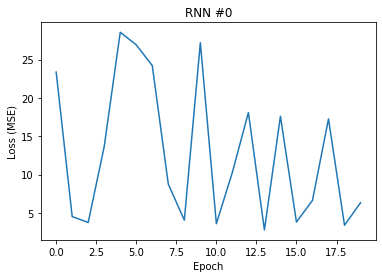

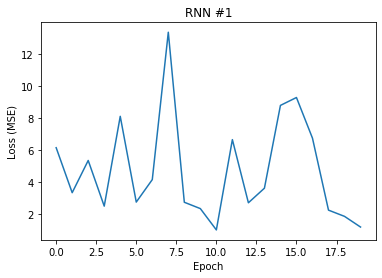

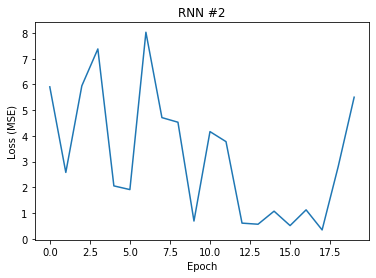

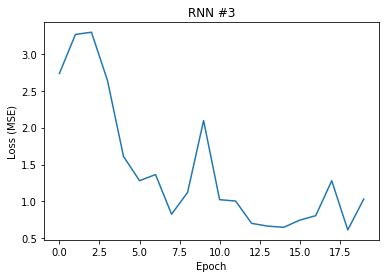

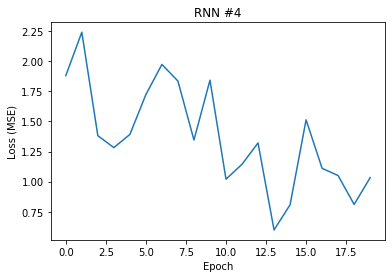

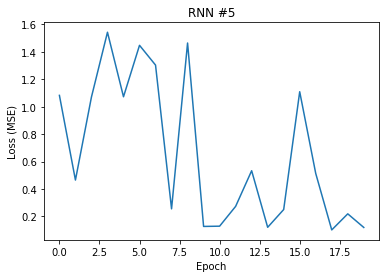

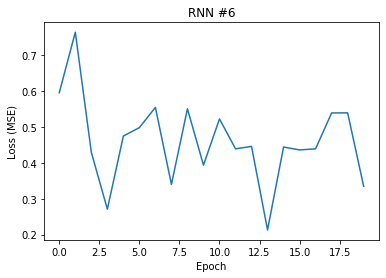

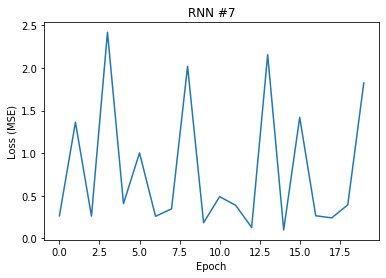

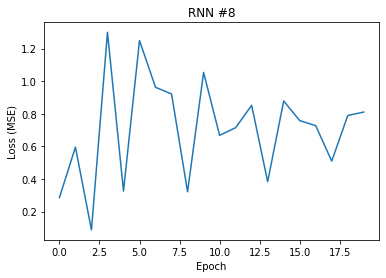

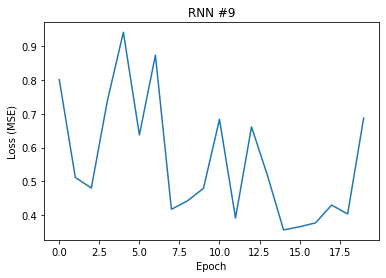

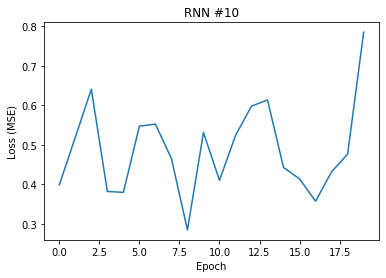

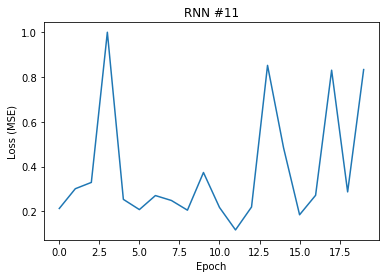

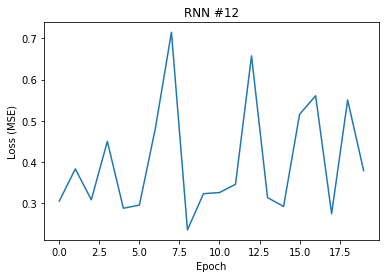

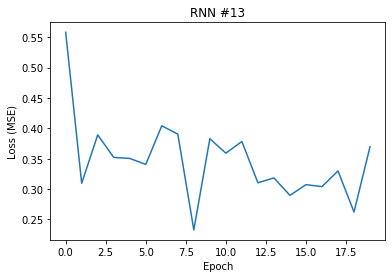

In [0]:
# Plot the loss and accuracy curves for training and validation 
def plot_losses(lst,num):
  x = list(range(len(lst)))
  plt.plot(x,lst)
  plt.xlabel('Epoch')
  plt.ylabel('Loss (MSE)')
  plt.title('RNN #' + str(num))
  plt.show()

for x in list(range(len(all_losses))):
  plot_losses(all_losses[x], x)

In [0]:
# ONLY RUN IF YOU WANT TO RESET THE RNN WEIGHTS
# Save RNN weights
for i in range(len(rnns)):
  path = file_path + 'RNN_Weights/rnn_' + str(i + 1) + '.pt'
  torch.save(rnns[i].state_dict(), path)

print(file_path)

/content/drive/My Drive/CS/CS494/Big Data Capstone Group/


In [0]:
# Load RNN weights - nice if you don't want to retrain all of the RNNs
rnns = []

for i in range(cleaned_data.shape[1]):
  path = file_path + 'RNN_Weights/rnn_' + str(i + 1) + '.pt'

  rnn = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size, n_layers=n_layers).cuda()
  
  rnn.load_state_dict(torch.load(path))
  rnn.eval()

  rnns.append(rnn)

#### Step 2: Calculate the likelihood of new data values given the GRU RNN model

In [0]:
# Function to prime an rnn's hidden state before learning the distribution of errors
def prime_rnn(prime_data, init_hidden, rnn):
  hiddens = init_hidden

  # Prime the decoder with the prime tensor
  for i in range(0, prime_data.size(0)):
    obs = prime_data[i, :]

    output, hiddens = rnn(obs, hiddens)

  return hiddens

# Accumulate error values from actual observation and predicted output
def calc_attr_error_vals(data, hidden_state, rnn):
  hiddens = hidden_state

  errors = torch.zeros((data.size(0),1))

  for i in range(0, data.size(0) - 1):
    obs = data[i, :]

    # Predict next observation
    output, hiddens = rnn(obs, hiddens) 

    # Get true next observation
    next_obs = data[i+1:i+2, :]

    # Calculate error
    errors[i] = next_obs - output

  return errors


In [0]:
# Function for calculating the error matrix
def calc_error_matrix(data, rnns):
  # Use first 10 examples to prime RNN hidden state
  rnn_prime_data = torch.Tensor(data[:10, :]).cuda()

  error_tensor_list = []

  for i in range(len(rnns)):
    # Get corresponding RNN
    attr_rnn = rnns[i]
    attr_rnn = attr_rnn.cuda()

    # Initialize hidden state
    init_hidden = attr_rnn.init_hidden().cuda()

    # Extract attribute column from prime data
    prime_attr_col = rnn_prime_data[:, i:i+1]
    prime_attr_col = prime_attr_col.cuda()

    learned_hidden_state = prime_rnn(prime_attr_col, init_hidden, attr_rnn)
    
    # Extract attribute column from learning data
    learning_attr_col = data[:, i:i+1]
    learning_attr_col = learning_attr_col.cuda()

    attr_errors = calc_attr_error_vals(learning_attr_col, learned_hidden_state, attr_rnn)

    error_tensor_list.append(attr_errors)
  
  return torch.cat(error_tensor_list, 1)

def split_into_train_test_errors(error_tensor, split_point):
  training_errors = error_tensor[:split_point,:]
  test_errors = error_tensor[split_point:, :]

  return training_errors, test_errors

In [0]:
# From computed error matrix (# attributes x # instances) fit normal distributions 
#   to each feature
def fit_errors_to_normal_distributions(error_matrix):
  error_distributions = []
  for j in range(error_matrix.shape[1]):
    attr_error_matrix = error_matrix[:, j]

    attr_mean = attr_error_matrix.mean()
    attr_std = attr_error_matrix.std()

    error_dist = Normal(attr_mean, attr_std)
    error_distributions.append(error_dist)
  
  return error_distributions

# Transform cleaned data from numpy to tensor
cleaned_data_tensor = torch.from_numpy(cleaned_data).float()

# Calculate errors for entire dataset
errors_matrix = calc_error_matrix(cleaned_data_tensor, rnns)

# Split dataset at the same place as the training/test split when training RNNs
training_errors, test_errors = split_into_train_test_errors(errors_matrix, split_point)

# Fit normal distributions to each attribute in the training set
error_distributions = fit_errors_to_normal_distributions(training_errors)

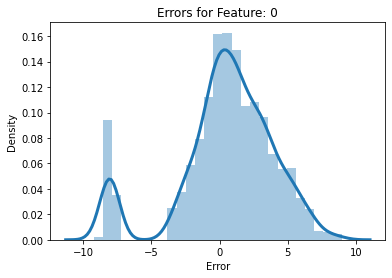

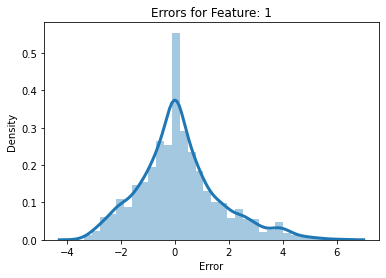

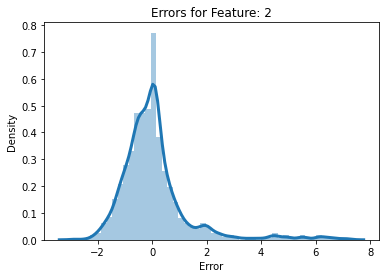

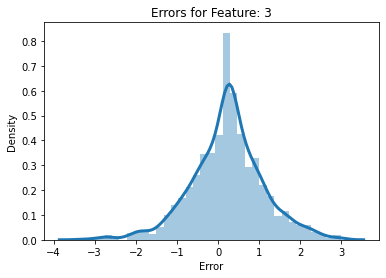

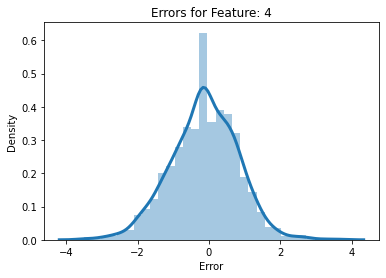

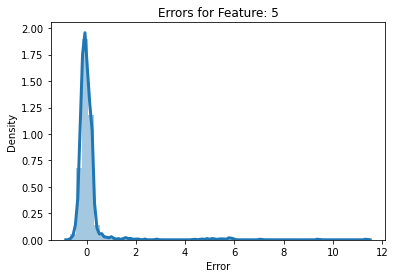

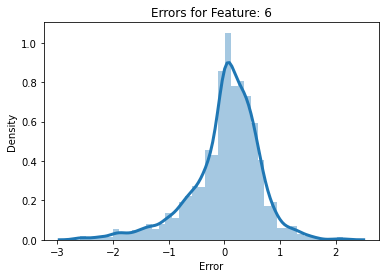

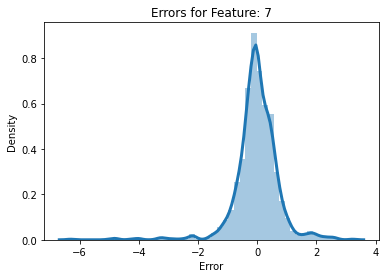

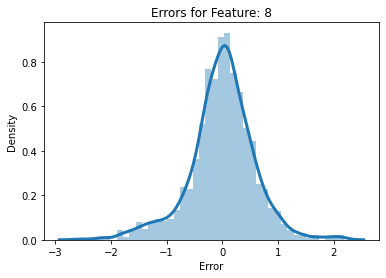

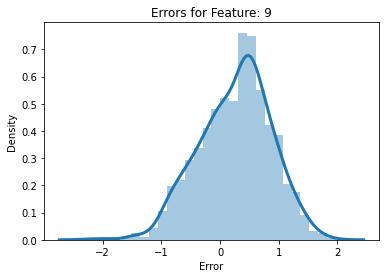

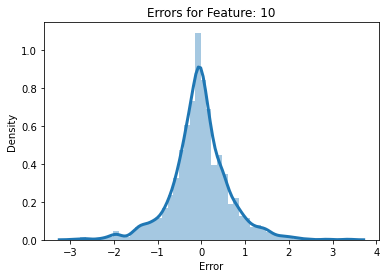

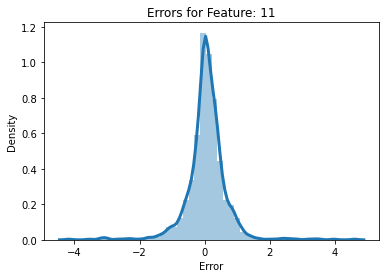

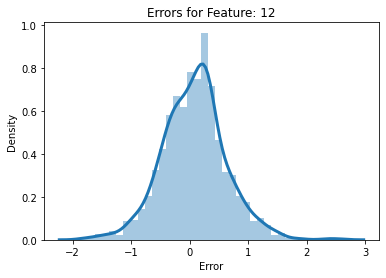

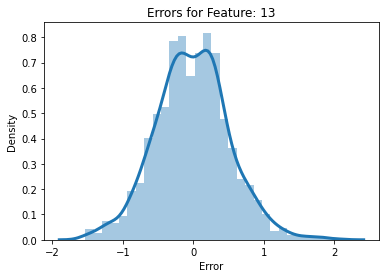

In [22]:
# Plot errors for visualation purposes, to confirm they are approximately normal
def plot_errors(train_err, ind):
  sns.distplot(train_err.data.numpy(), hist = True, kde = True,
                 kde_kws = {'linewidth': 3})
  plt.xlabel('Error')
  plt.ylabel('Density')
  plt.title('Errors for Feature: ' + str(ind))
  plt.show()
  
for x in list(range(len(training_errors[0]))):
  plot_errors(training_errors[:,x], x)

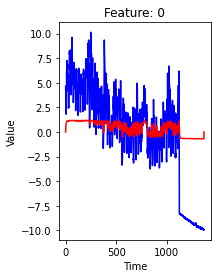

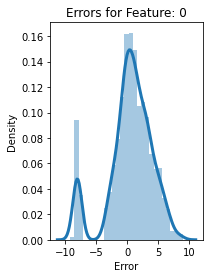

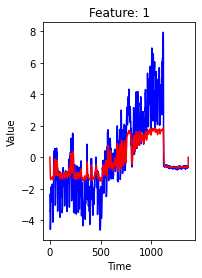

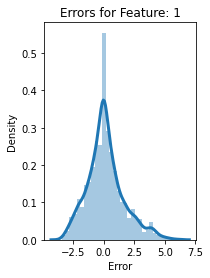

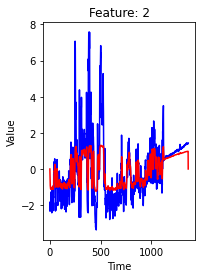

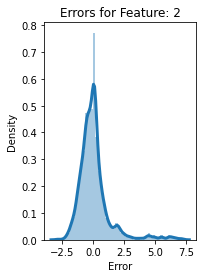

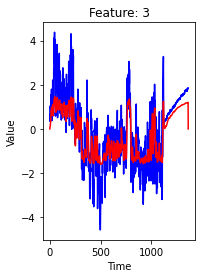

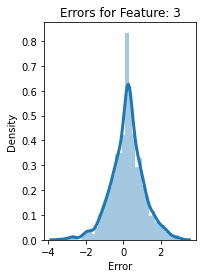

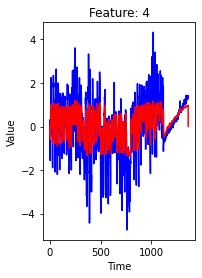

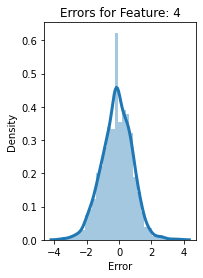

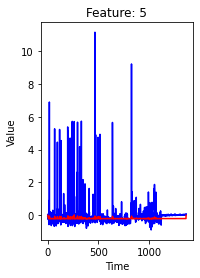

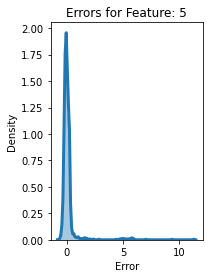

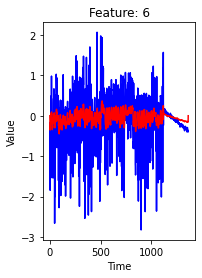

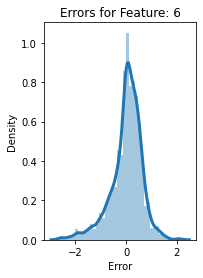

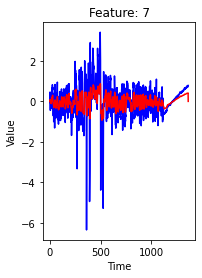

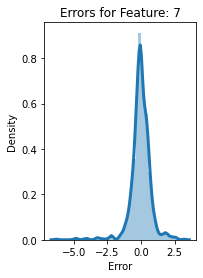

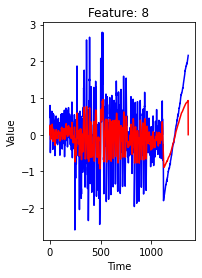

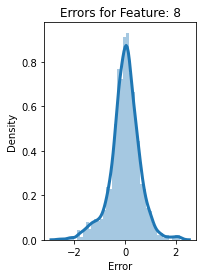

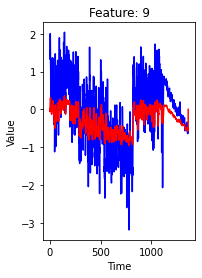

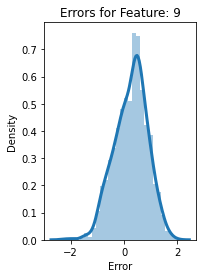

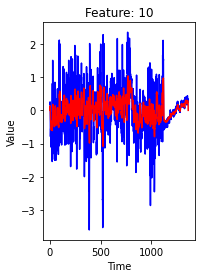

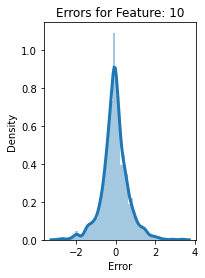

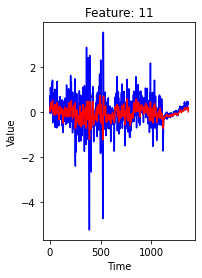

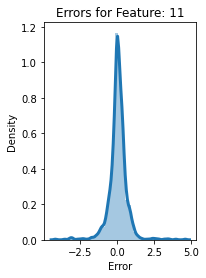

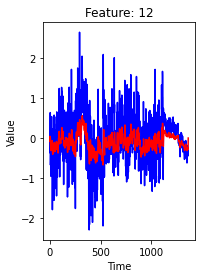

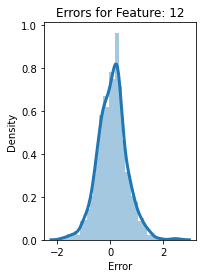

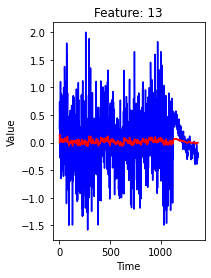

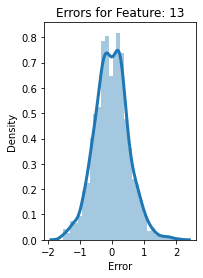

In [23]:
# Graph of RNN predictions vs. real values
for i in range(len(rnns)):
  real_cur_col = cleaned_data[:, i]
  real_cur_col = torch.Tensor(real_cur_col).cuda()
  real_cur_col = real_cur_col.unsqueeze(-1)

  # Get corresponding RNN
  attr_rnn = rnns[i]
  attr_rnn = attr_rnn.cuda()

  # Initialize hidden state
  hiddens = attr_rnn.init_hidden().cuda()

  # Prime for first value
  rnn_prime_data = real_cur_col[0]

  # Prime the decoder with the prime tensor
  for j in range(0, rnn_prime_data.size(0)):
    output, hiddens = rnn(rnn_prime_data, hiddens)

  predictions = torch.zeros((real_cur_col.size(0),1))

  for j in range(1, real_cur_col.size(0) - 1):
    obs = real_cur_col[j]
  
    output, hiddens = attr_rnn(obs, hiddens) 

    predictions[j] = output

  plt.subplot(1, 2, 1)
  plt.plot(real_cur_col.cpu(), color='blue')
  plt.plot(predictions.detach().numpy(), color='red')
  plt.xlabel('Time')
  plt.ylabel('Value')
  plt.title('Feature: ' + str(i))
  plt.show()

  plt.subplot(1, 2, 2)
  plot_errors(training_errors[:,i], i)


In [0]:
# Calculate the likelihood for each error according to the associated error_distribution
def get_lkhd(dat, error_dist):
  lkhd_list = []
  for i in range(len(error_dist)):
    x = error_dist[i].cdf(torch.Tensor(dat[:,i])).data.numpy()

    # This ensures that both right and left tails have low likelihood
    lkhd_i = np.around(np.minimum(x, 1-x), 3)
    lkhd_list.append(lkhd_i)
    
  lkhd = np.array(lkhd_list).transpose()
  return lkhd

In [0]:
# Calculate likelihoods for training errors
lkhd_train = get_lkhd(training_errors, error_distributions)

# Calculate likelihoods for test errors
lkhd_test = get_lkhd(test_errors, error_distributions)

### Step 3: Calculate p-value Ranges


![picture](https://drive.google.com/uc?id=1qaahwj1a-CvP9MbbqU8ruthIllaS-JNK)


In [0]:
# Function for getting the matrix of p-values
# Unneccesary because we assumed a theoretical for the errors, but is necessary
#   if you empirically compute a distribution (Bayesian Network)
def get_p_range(lkhd_arr_train, lkhd_arr_test):
  # Declare empty array to fill with tuples
  p_val_ranges = np.empty( ((len(lkhd_arr_test)), len(lkhd_arr_test[0])), dtype = tuple)

  # Iterate through the features
  for j in range(np.shape(lkhd_arr_test)[1]):

    # Compare to training lkhd for each feature
    for i in range(np.shape(lkhd_arr_test)[0]):
      n_beat = sum(lkhd_arr_test[i,j] > lkhd_arr_train[:,j])
      n_tie = sum(lkhd_arr_test[i,j] == lkhd_arr_train[:,j])
      p_low = n_beat / (len(lkhd_arr_train[:,j]) + 1)
      p_high = (n_beat + n_tie + 1) / (len(lkhd_arr_train[:,j]) + 1)
      p_val_ranges[i,j] = (p_low, p_high)

  return p_val_ranges

### Step 4: Define Local Neighborhoods

In [0]:
# After conversing with our manager, we decided not to do this step of the algorithm 
#  (at least for now).

### Step 5: Subset Scanning

![picture](https://drive.google.com/uc?id=1xEVpqiLLmL_Mw37Ix5lZX4E3gP_PfzEr)

In [0]:
# Function for calculating the KL divergence
def calc_KL_divergence(x, y):
  return (x * np.log(x / y)) + ((1 - x) * np.log((1 - x) / (1 - y)))

![image](https://drive.google.com/uc?id=1qQD-TtHzM7G2bgX97RkZlBbXhlAfVXDs)

![image](https://drive.google.com/uc?id=1Xb9vcacI2jpJxN2d5q-l7IhJUPKTXFq1)

In [0]:
# Function for calculating the f statistic as defined in the paper
def calc_f_statistic(n_alphas, alpha):
  N_alpha = np.sum(n_alphas)
  N = n_alphas.shape[0] * n_alphas.shape[1]

  kl = calc_KL_divergence(N_alpha / N, alpha)

  return N * kl

![image](https://drive.google.com/uc?id=11CL8BmBWHS1mjFsbg_5VrHRVWgKjLZsX)

In [0]:
# Function for calculating the matrix of 0s and 1s as defined in the screenshot 
#  of the paper.  If a given p-value is less than alpha max, it is flagged as 1.
def calculate_n_alphas(alpha, p_vals):
  n_alphas = np.array(p_vals)

  for i in range(np.shape(p_vals)[0]):
    for j in range(np.shape(p_vals)[1]):
      if p_vals[i][j] < alpha:
        n_alpha = 1
      else:
        n_alpha = 0

      # If using p-value ranges
      # else:
      #   n_alpha = (alpha - p_vals[i][j]) / (p_vals[i][j] - p_vals[i][j])
      
      n_alphas[i][j] = n_alpha

  return n_alphas

In [0]:
# Function for initializing A to a random subset of attributes
def get_subset(a, b):
  indices = np.arange(a, b)
  size = np.random.randint(1, b)
  return np.random.choice(indices, size, replace=False)

![image](https://drive.google.com/uc?id=1oISNVhBqNq05MLDmvZQEiyKdkLN2bCns)

In [0]:
# Function for getting the U set (set of alphas) as defined in definition 3
def get_U(S_p_vals, alpha_max):
  S_p_vals_flattened = np.reshape(S_p_vals, -1)

  U = [S_p_vals_flattened[i] for i in range(len(S_p_vals_flattened)) if S_p_vals_flattened[i] < alpha_max]
  U.extend([0, alpha_max])

  return U

![picture](https://drive.google.com/uc?id=1Rjvlt7ZMPmkHrb-CH1NSTkeMVgWqsFGA)


##### Part b, with additional detail:

![image](https://drive.google.com/uc?id=1d_FmxL4Csv68qOk3gjwVam2GNpIkmSTP)

In [0]:
# Main function for FGSS as defined in the paper
def FGSS(lkhd_test, alpha_max=0.05, Y=50):
  f_stat_max = 0
  S_star = None

  # Progress bar (for visualizing the converging process)
  loop = tqdm(total = Y, position = 0, leave = False)

  for _ in range(Y):
    # Part a
    A = np.arange(0, lkhd_test.shape[1], dtype=int)
    A_star = get_subset(0, lkhd_test.shape[1])
    R = np.arange(0, lkhd_test.shape[0], dtype=int)
    R_star = np.arange(0, lkhd_test.shape[0], dtype=int)

    converged = False

    while not converged:
      # Part b i
      R_prev = np.copy(R_star)
      A_prev = np.copy(A_star)
      curr_f_stat_max = 0

      S_p_vals = lkhd_test[np.ix_(R, A_star)]  

      U = get_U(S_p_vals, alpha_max)

      f_stat = 0
      records = None

      for alpha in U:
        R_star = np.arange(0, lkhd_test.shape[0], dtype=int)
        n_alphas = calculate_n_alphas(alpha, S_p_vals)

        G = np.sum(n_alphas, axis=1).reshape((-1, 1)).astype(int)
        R_star = np.hstack((R_star.reshape((-1, 1)), G))
        n_alphas = np.hstack((n_alphas, G))

        R_star = R_star[R_star[:, -1].argsort()]
        n_alphas = n_alphas[n_alphas[:, -1].argsort()]

        for k in range(R_star.shape[0] - 1, -1, -1):
          curr_n_alphas = n_alphas[k:, 0:-1]
          curr_f_stat = calc_f_statistic(curr_n_alphas, alpha)

          if curr_f_stat > f_stat:
            f_stat = curr_f_stat
            records = R_star[k:, 0]

      R_star = records if records is not None else R_star[:, 0]
      curr_f_stat_max += f_stat

      # Part b ii
      ## Want to reset A to be all attributes
      S_p_vals = lkhd_test[np.ix_(R_star, A)] 

      U = get_U(S_p_vals, alpha_max)

      f_stat = 0
      attributes = None

      for alpha in U:
        A_star = np.arange(0, lkhd_test.shape[1], dtype=int)
        n_alphas = calculate_n_alphas(alpha, S_p_vals)

        G = np.sum(n_alphas, axis=0).reshape((1, -1)).astype(int)
        A_star = np.vstack((A_star.reshape((1, -1)), G))
        n_alphas = np.vstack((n_alphas, G))

        A_star = A_star[:, A_star[-1].argsort()]
        n_alphas = n_alphas[:, n_alphas[-1].argsort()]

        for k in range(A_star.shape[1] - 1, -1, -1):
          curr_n_alphas = n_alphas[0:-1, k:]
          curr_f_stat = calc_f_statistic(curr_n_alphas, alpha)

          if curr_f_stat > f_stat:
            f_stat = curr_f_stat
            attributes = A_star[0, k:]

      A_star = attributes if attributes is not None else A_star[0, :]
      curr_f_stat_max += f_stat

      if curr_f_stat_max > f_stat_max:
        f_stat_max = curr_f_stat_max
        S_star = (R_star, A_star)

      if set(R_star) == set(R_prev) and set(A_star) == set(A_prev):
        converged = True

    loop.update(1)

  return S_star

# Simulation Testing

In [0]:
# Have the RNNs generate 1000 values into the future.
test_len = 1000
generated_vals = []

for i in range(len(rnns)):
  # Get corresponding RNN
  attr_rnn = rnns[i]
  attr_rnn = attr_rnn.cuda()

  # Initialize hidden state
  init_hidden = attr_rnn.init_hidden().cuda()

  # Extract attribute column from prime data
  prime_attr_col = torch.Tensor(training_data[-10:, i:i+1])
  prime_attr_col = prime_attr_col.cuda()

  learned_hidden_state = prime_rnn(prime_attr_col, init_hidden, attr_rnn)
  
  outputs = torch.zeros((test_len, 1))
  output = prime_attr_col[-1, :]

  for j in range(test_len):
    output, learned_hidden_state = attr_rnn(output, learned_hidden_state)
    output = output.squeeze(-1).squeeze(-1)
    outputs[j] = output

  generated_vals.append(outputs)

generated_test_set = torch.cat(generated_vals, 1)

In [0]:
# From the generated values, randomly add noise to some of them in order to create
#  our own anomalies.  We will then see if FGSS can detect them
proportion_of_anomalies = 0.2
generated_test_set = generated_test_set.detach().numpy()
modified_generated_test_set = np.copy(generated_test_set)

test_R = np.random.randint(test_len - 1, size=int(proportion_of_anomalies * test_len))
test_A = get_subset(0, modified_generated_test_set.shape[1])

for i in test_R:
  for j in test_A:
    multiplier = np.random.randint(2, 7)
    modified_generated_test_set[i, j] = multiplier * np.random.random_sample()

In [0]:
# Calculate the errors, and with those calculate the likelihoods of each record
#  and attribute.  Since this is a simulation, we are assuming that the 1000
#  instances the RNNs generated are correct, and the ones we added noise to are
#  not correct, so we want to detect those.
generated_test_errors = generated_test_set - modified_generated_test_set
generated_test_lkhd = get_lkhd(generated_test_errors, error_distributions)

In [37]:
# Run FGSS
S_star = FGSS(generated_test_lkhd, alpha_max=0.05)

  0%|          | 0/50 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 50/50 [1:28:52<00:00, 113.42s/it]

In [38]:
# Print the results of FGSS
if S_star is not None:
  test_R = set(test_R)
  test_A = set(test_A)
  detected_R = set(S_star[0])
  detected_A = set(S_star[1])

  print("Test records:")
  print(sorted(test_R))
  print("\nDetected records:")
  print(sorted(detected_R))
  print("\nTest attributes:")
  print(sorted(test_A))
  print("\nDetected attributes:")
  print(sorted(detected_A))
  print("\nRecords missed")
  print(test_R.difference(detected_R))
  print("\nAttributes missed")
  print(test_A.difference(detected_A))
  print()
  print("Records false positives")
  print(detected_R.difference(test_R))
  print("\nAttributes false positives")
  print(detected_A.difference(test_A))
  print()

else:
  print("No anomalies found")

Test records:
[5, 13, 16, 17, 20, 25, 35, 45, 46, 48, 60, 68, 89, 90, 92, 93, 96, 102, 108, 109, 110, 111, 112, 115, 119, 123, 137, 139, 141, 145, 168, 175, 179, 183, 195, 197, 206, 208, 229, 232, 238, 240, 244, 258, 259, 265, 268, 271, 284, 287, 300, 301, 315, 316, 327, 336, 339, 340, 341, 342, 349, 357, 362, 385, 392, 398, 406, 410, 414, 423, 428, 433, 435, 444, 447, 452, 453, 469, 486, 488, 491, 496, 498, 499, 502, 508, 511, 524, 525, 529, 539, 540, 557, 564, 571, 572, 574, 575, 581, 583, 586, 592, 602, 617, 618, 619, 620, 628, 632, 634, 636, 646, 655, 662, 667, 670, 676, 685, 686, 703, 706, 709, 711, 713, 715, 717, 719, 720, 724, 726, 740, 742, 745, 752, 758, 761, 768, 782, 786, 789, 792, 795, 798, 799, 801, 815, 823, 827, 832, 837, 843, 847, 853, 861, 863, 884, 885, 887, 896, 897, 898, 912, 915, 917, 924, 929, 935, 937, 940, 942, 946, 949, 952, 956, 957, 964, 967, 968, 978, 980, 983, 987, 992, 994, 995, 996]

Detected records:
[5, 13, 16, 20, 25, 35, 45, 46, 48, 60, 68, 89, 90, 92